# Foreground - Background Color Generation for MNIST

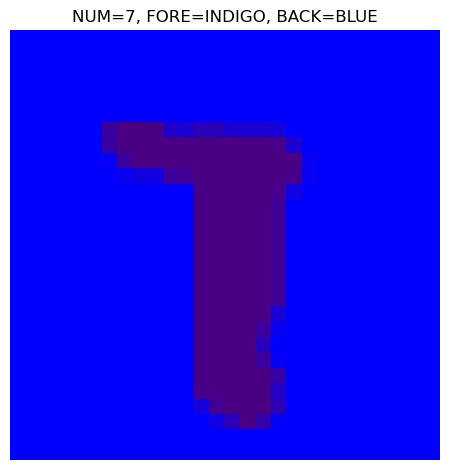

In [2]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
# MNIST 데이터셋을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 무지개 색상 팔레트를 정의합니다 (7가지 색상).
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

RAINBOW_NAMES = [
    'RED',
    'ORANGE',
    'YELLOW',
    'GREEN',
    'BLUE',
    'INDIGO',
    'VIOLET'
]

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    # return tuple(np.random.randint(0, 256, size=3))
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGBA')
    return colored_digit

def overlay_digit_on_background(colored_digit):
    """투명도를 제거하고 일관된 배경 이미지를 생성합니다."""
    final_image = colored_digit.convert('RGB')  # 투명도를 제거합니다.
    return final_image

# 전경과 배경 색상이 있는 MNIST 데이터셋을 생성하고 표시합니다.
idx = np.random.randint(0, len(mnist))  # 0~9 사이의 숫자
image, label = mnist[idx]
pil_image = transforms.ToPILImage()(image)

# 전경과 배경 색상을 무작위로 선택합니다.
fg_color, fg_label = get_random_rainbow_color()
bg_color, bg_label = get_random_rainbow_color()

# 전경과 배경 색상이 같지 않도록 보장합니다.
while bg_color == fg_color:
  bg_color, bg_label = get_random_rainbow_color()

# 선택된 색상으로 숫자 이미지를 색칠합니다.
colored_digit = colorize_digit(pil_image, fg_color, bg_color)

if image is not None:
  # 최종 이미지를 표시합니다.
  final_image = overlay_digit_on_background(colored_digit)
  plt.imshow(final_image)
  plt.axis('off')  # 축을 비활성화합니다.
  plt.title(f'NUM={label}, FORE={fg_label}, BACK={bg_label}')

  # 레이아웃을 조정하고 화면에 표시합니다.
  plt.tight_layout()
  plt.show()


In [3]:
import torch
from torchvision import datasets, transforms
from PIL import Image, ImageOps
import numpy as np
import random
import os
from tqdm import tqdm
import pickle

# 무지개 색상 팔레트를 정의합니다.
RAINBOW_COLORS = [
    (255, 0, 0),    # 빨강
    (255, 127, 0),  # 주황
    (255, 255, 0),  # 노랑
    (0, 255, 0),    # 초록
    (0, 0, 255),    # 파랑
    (75, 0, 130),   # 남색 (인디고)
    (148, 0, 211)   # 보라
]

RAINBOW_NAMES = [
    'RED',
    'ORANGE',
    'YELLOW',
    'GREEN',
    'BLUE',
    'INDIGO',
    'VIOLET'
]

def get_random_rainbow_color():
    """무지개 팔레트에서 임의의 색상을 선택합니다."""
    idx = np.random.randint(0, len(RAINBOW_COLORS))
    return RAINBOW_COLORS[idx], RAINBOW_NAMES[idx]

def colorize_digit(digit_image, fg_color, bg_color):
    """숫자 이미지에 전경(fg)과 배경(bg) 색상을 적용합니다."""
    digit = digit_image.convert('L')  # 이미지를 그레이스케일로 변환합니다.
    colored_digit = ImageOps.colorize(digit, black=bg_color, white=fg_color).convert('RGB')
    return colored_digit

# MNIST 데이터셋을 로드합니다.
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

X_color = []
X_bg = []
X_fg = []
X_digit = []
# MNist 데이터에 color를 반복으로 사용해서 색칠하기
for idx in tqdm(range(len(mnist))):
    image, label = mnist[idx]
    pil_image = transforms.ToPILImage()(image)
    
    # 전경색과 배경색을 무작위로 선택합니다.
    fg_color, fg_label = get_random_rainbow_color()
    bg_color, bg_label = get_random_rainbow_color()
    
    # 전경색과 배경색이 같지 않도록 보장합니다.
    while bg_color == fg_color:
        bg_color, bg_label = get_random_rainbow_color()
    
    # 선택된 색상으로 숫자 이미지를 색칠합니다.
    colored_digit = colorize_digit(pil_image, fg_color, bg_color)
    
    X_color.append(np.array(colored_digit)) 
    X_bg.append(bg_label)  
    X_fg.append(fg_label)
    X_digit.append(label)   

100%|██████████| 60000/60000 [00:27<00:00, 2190.47it/s]


In [4]:
#데이터 증강 이전 Randomforset model 학습결과

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_flat = [x.flatten() for x in X_color] #1차원 벡터로 변환 안하면 에러뜸
X_train_bg, X_test_bg, y_train_bg, y_test_bg = train_test_split(X_flat, X_bg, test_size=0.2, random_state=42)
X_train_fg, X_test_fg, y_train_fg, y_test_fg = train_test_split(X_flat, X_fg, test_size=0.2, random_state=42)
X_train_digit, X_test_digit, y_train_digit, y_test_digit = train_test_split(X_flat, X_digit, test_size=0.2, random_state=42)

In [6]:
rf_model_bg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_bg.fit(X_train_bg, y_train_bg)

y_pred_bg = rf_model_bg.predict(X_test_bg)

accuracy = accuracy_score(y_test_bg, y_pred_bg)
print(f"RF background accuracy: {accuracy * 100:.2f}%")

RF background accuracy: 100.00%


In [7]:
rf_model_fg = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_fg.fit(X_train_fg, y_train_fg)

y_pred_fg = rf_model_fg.predict(X_test_fg)

accuracy = accuracy_score(y_test_fg, y_pred_fg)
print(f"RF foregound acc: {accuracy * 100:.2f}%")

RF foregound acc: 99.94%


In [8]:
rf_model_digit = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_digit.fit(X_train_digit, y_train_digit)

y_pred_digit = rf_model_digit.predict(X_test_digit)

accuracy = accuracy_score(y_test_digit, y_pred_digit)
print(f"RF acc: {accuracy * 100:.2f}%")

RF acc: 93.08%


In [9]:
#데이터 증강 이후 RF 결과 